In [1]:
import librosa
import librosa.display
import numpy as np

In [2]:
#Create a constant-Q basis

# 중심 주파수 계산
freqs = librosa.cqt_frequencies(n_bins=84, # constant-Q bin의 수
                                fmin=librosa.note_to_hz('C1')
                               ) # C1부터 84개 노트의 중심 주파수 반환.
# constant-Q 생성
basis, lengths = librosa.filters.wavelet(freqs=freqs, sr=22050)
display(freqs)
display(basis)
display(lengths)

array([  32.70319566,   34.64782887,   36.70809599,   38.89087297,
         41.20344461,   43.65352893,   46.24930284,   48.9994295 ,
         51.9130872 ,   55.        ,   58.27047019,   61.73541266,
         65.40639133,   69.29565774,   73.41619198,   77.78174593,
         82.40688923,   87.30705786,   92.49860568,   97.998859  ,
        103.82617439,  110.        ,  116.54094038,  123.47082531,
        130.81278265,  138.59131549,  146.83238396,  155.56349186,
        164.81377846,  174.61411572,  184.99721136,  195.99771799,
        207.65234879,  220.        ,  233.08188076,  246.94165063,
        261.6255653 ,  277.18263098,  293.66476792,  311.12698372,
        329.62755691,  349.22823143,  369.99442271,  391.99543598,
        415.30469758,  440.        ,  466.16376152,  493.88330126,
        523.2511306 ,  554.36526195,  587.32953583,  622.25396744,
        659.25511383,  698.45646287,  739.98884542,  783.99087196,
        830.60939516,  880.        ,  932.32752304,  987.76660

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],
      dtype=complex64)

array([11685.75603456, 11029.88494528, 10410.82507169,  9826.51035899,
        9274.99071115,  8754.42548262,  8263.07733533,  7799.30644052,
        7361.56500594,  6948.39211024,  6558.4088273 ,  6190.31362415,
        5842.87801728,  5514.94247264,  5205.41253584,  4913.25517949,
        4637.49535557,  4377.21274131,  4131.53866766,  3899.65322026,
        3680.78250297,  3474.19605512,  3279.20441365,  3095.15681207,
        2921.43900864,  2757.47123632,  2602.70626792,  2456.62758975,
        2318.74767779,  2188.60637065,  2065.76933383,  1949.82661013,
        1840.39125148,  1737.09802756,  1639.60220682,  1547.57840604,
        1460.71950432,  1378.73561816,  1301.35313396,  1228.31379487,
        1159.37383889,  1094.30318533,  1032.88466692,   974.91330506,
         920.19562574,   868.54901378,   819.80110341,   773.78920302,
         730.35975216,   689.36780908,   650.67656698,   614.15689744,
         579.68691945,   547.15159266,   516.44233346,   487.45665253,
      

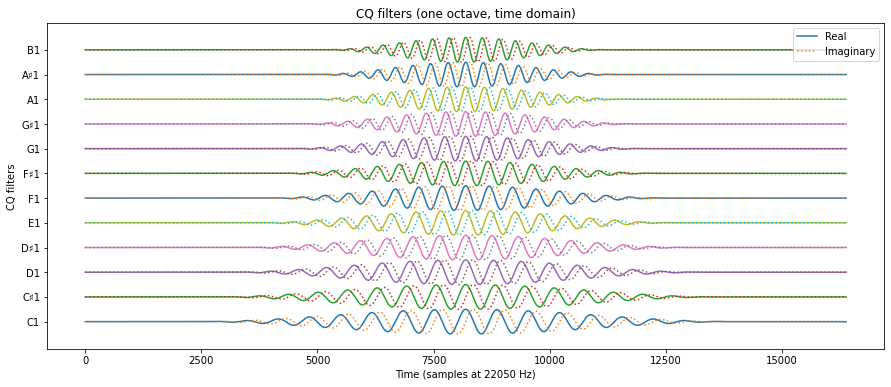

In [4]:
#Plot one octave of filters in time and frequency

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 6))
notes = librosa.midi_to_note(np.arange(24, 24 + len(basis)))

for i, (f, n) in enumerate(zip(basis, notes[:12])):
    f_scale = librosa.util.normalize(f) / 2
    
    ax.plot(i + f_scale.real)
    ax.plot(i + f_scale.imag, linestyle=':')
    
ax.set(yticks=np.arange(len(notes[:12])), yticklabels=notes[:12],
          ylabel='CQ filters',
          title='CQ filters (one octave, time domain)',
          xlabel='Time (samples at 22050 Hz)')
ax.legend(['Real', 'Imaginary'])

[Text(0, 0.5, 'CQ filters'),
 Text(0.5, 1.0, 'CQ filter magnitudes (frequency domain)')]

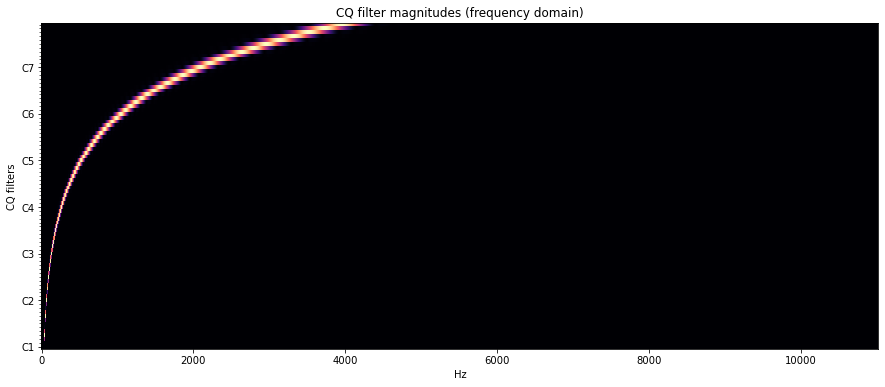

In [5]:
fig, ax = plt.subplots(figsize=(15, 6))
F = np.abs(np.fft.fftn(basis, axes=[-1]))
# Keep only the positive frequencies
F = F[:, :(1 + F.shape[1] // 2)]
librosa.display.specshow(F, x_axis='linear', y_axis='cqt_note', ax=ax)
ax.set(ylabel='CQ filters', title='CQ filter magnitudes (frequency domain)')

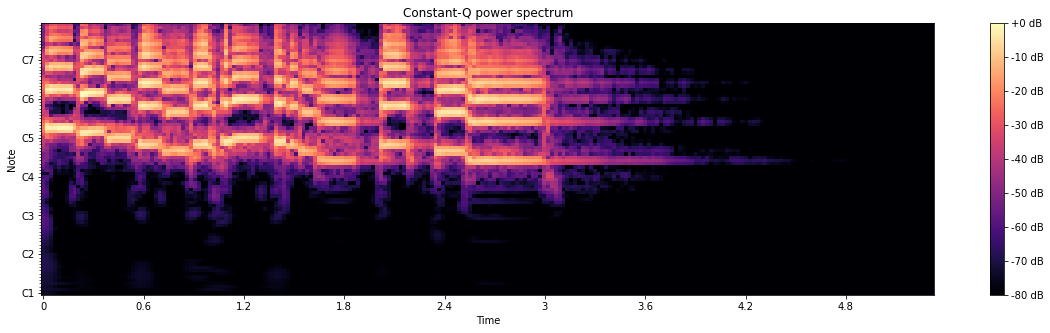

In [7]:
import matplotlib.pyplot as plt
y, sr = librosa.load(librosa.ex('trumpet'))
C = np.abs(librosa.cqt(y, sr=sr))

fig, ax = plt.subplots(figsize=(20,5))
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")